In [1]:
!pip install tensorflow opencv-python numpy matplotlib scikit-learn


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
  Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl (2.7 MB)


You should consider upgrading via the 'C:\Users\varsh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [3]:

DATASET_DIR = "Faultysolarpanels" 

IMG_SIZE = (128, 128)
class_names = sorted(os.listdir(DATASET_DIR))
class_to_idx = {name: i for i, name in enumerate(class_names)}
print("Classes:", class_names)


Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


In [4]:
def load_images_labels(data_dir):
    images = []
    labels = []
    for class_name in class_names:
        folder = os.path.join(data_dir, class_name)
        for img_file in os.listdir(folder):
            img_path = os.path.join(folder, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, IMG_SIZE)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img)
            labels.append(class_to_idx[class_name])
    return np.array(images), np.array(labels)

X, y = load_images_labels(DATASET_DIR)
X = X / 255.0  # Normalize


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
num_classes = len(class_names)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train_cat, validation_split=0.1, epochs=10, batch_size=32)


c:\Users\varsh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.2116 - loss: 2.4171 - val_accuracy: 0.3571 - val_loss: 1.5222
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.3808 - loss: 1.5555 - val_accuracy: 0.4429 - val_loss: 1.3942
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.4704 - loss: 1.3447 - val_accuracy: 0.6000 - val_loss: 1.2504
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.6015 - loss: 1.1190 - val_accuracy: 0.6143 - val_loss: 1.1687
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.7096 - loss: 0.8451 - val_accuracy: 0.6429 - val_loss: 1.0852
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.8247 - loss: 0.5779 - val_accuracy: 0.7000 - val_loss: 1.0168
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 228ms/step - accuracy: 0.8545 - loss: 0.4389 - val_accuracy: 0.6571 - val_loss: 1.0684
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 0.9355 - loss: 0.2987 - val_accuracy: 0.

In [7]:
model.save("solar_panel_defect_classifier.h5")
print("Model saved as solar_panel_defect_classifier.h5")


Model saved as solar_panel_defect_classifier.h5


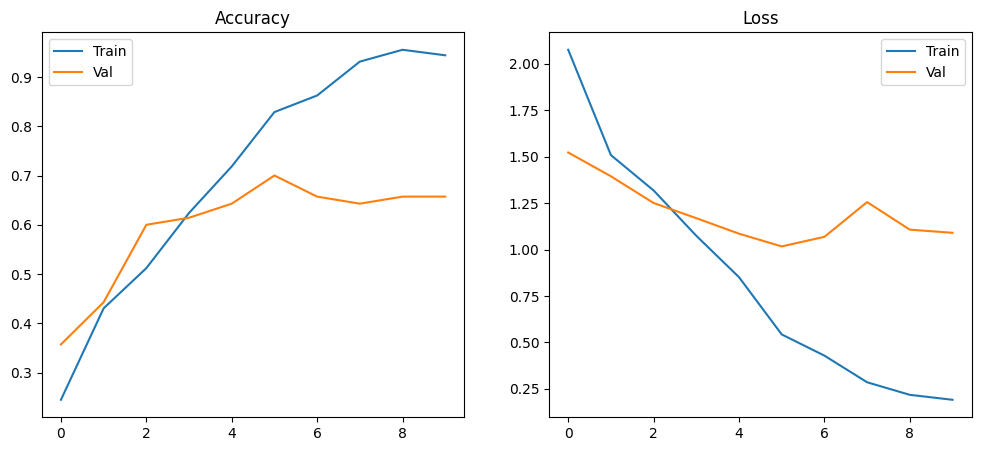

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.legend()
plt.title('Loss')

plt.show()
